Đã tải kết quả đánh giá trước đó

Đang tải dữ liệu và mô hình...
Hoàn thành tải dữ liệu - Thời gian: 15.44s
Số lượng mẫu test: 200,000
Điểm đánh giá trung bình: 3.62

Bắt đầu đánh giá các giá trị alpha:

Đang đánh giá alpha = 0.1


Alpha 0.1: 100.00%|███████████████████████████████████████| 200000/200000 [00:25<00:00,  3.87 mẫu/s]



Hoàn thành alpha = 0.1
   - RMSE: 0.982950
   - Thời gian: 25.74s
   - Tốc độ: 7,770.4 mẫu/giây

Đang đánh giá alpha = 0.2


Alpha 0.2: 100.00%|████████████████████████████████████| 200000/200000 [11:41:23<00:00,  4.57 mẫu/s]



Hoàn thành alpha = 0.2
   - RMSE: 0.991254
   - Thời gian: 42083.41s
   - Tốc độ: 4.8 mẫu/giây

Đang đánh giá alpha = 0.3


Alpha 0.3: 100.00%|████████████████████████████████████| 200000/200000 [12:30:11<00:00,  4.44 mẫu/s]



Hoàn thành alpha = 0.3
   - RMSE: 0.970511
   - Thời gian: 45011.10s
   - Tốc độ: 4.4 mẫu/giây

Đang đánh giá alpha = 0.4


Alpha 0.4: 100.00%|████████████████████████████████████| 200000/200000 [12:53:04<00:00,  4.31 mẫu/s]



Hoàn thành alpha = 0.4
   - RMSE: 0.952564
   - Thời gian: 46384.43s
   - Tốc độ: 4.3 mẫu/giây

Đang đánh giá alpha = 0.5


Alpha 0.5: 100.00%|████████████████████████████████████| 200000/200000 [13:09:59<00:00,  4.22 mẫu/s]



Hoàn thành alpha = 0.5
   - RMSE: 0.937447
   - Thời gian: 47399.83s
   - Tốc độ: 4.2 mẫu/giây

Đang đánh giá alpha = 0.6


Alpha 0.6: 100.00%|████████████████████████████████████| 200000/200000 [13:25:03<00:00,  4.14 mẫu/s]



Hoàn thành alpha = 0.6
   - RMSE: 0.925299
   - Thời gian: 48303.22s
   - Tốc độ: 4.1 mẫu/giây

Đang đánh giá alpha = 0.7


Alpha 0.7: 100.00%|████████████████████████████████████| 200000/200000 [13:48:02<00:00,  4.03 mẫu/s]



Hoàn thành alpha = 0.7
   - RMSE: 0.916238
   - Thời gian: 49682.82s
   - Tốc độ: 4.0 mẫu/giây

Đang đánh giá alpha = 0.8


Alpha 0.8: 100.00%|████████████████████████████████████| 200000/200000 [14:22:31<00:00,  3.86 mẫu/s]



Hoàn thành alpha = 0.8
   - RMSE: 0.910355
   - Thời gian: 51752.04s
   - Tốc độ: 3.9 mẫu/giây

Đang đánh giá alpha = 0.9


Alpha 0.9: 100.00%|████████████████████████████████████| 200000/200000 [14:50:09<00:00,  3.74 mẫu/s]



Hoàn thành alpha = 0.9
   - RMSE: 0.907714
   - Thời gian: 53409.25s
   - Tốc độ: 3.7 mẫu/giây

Kết quả tối ưu:
Alpha tốt nhất: 0.9 với RMSE = 0.907714


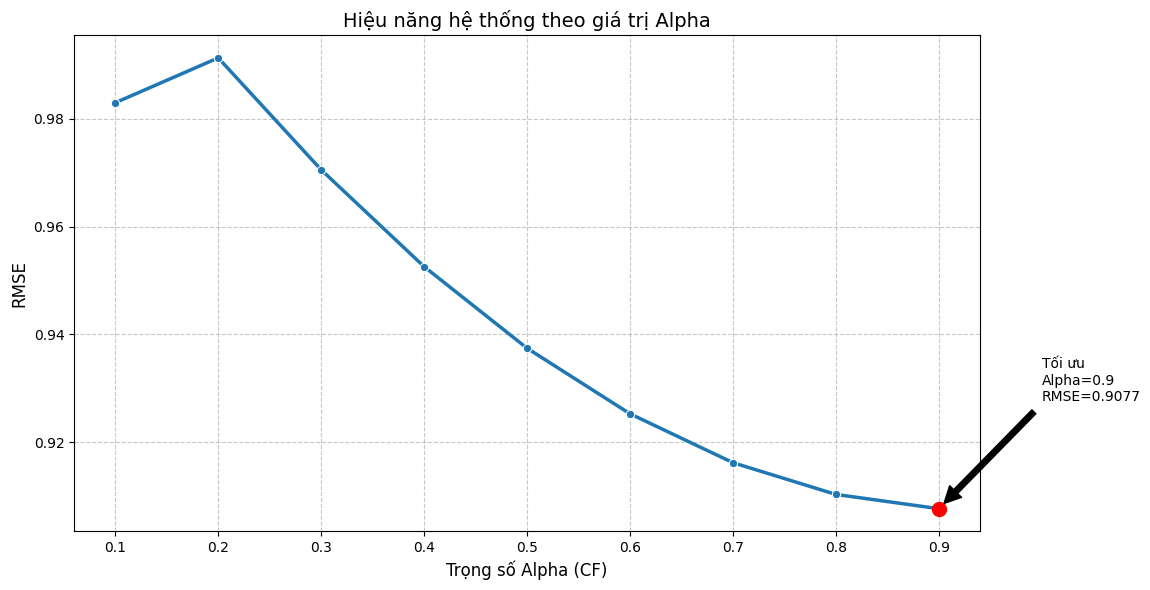


Đã lưu kết quả cuối cùng và dọn dẹp file tiến trình


'\n## Kết luận\n- Quá trình đánh giá đã hoàn thành thành công\n- Giá trị alpha tối ưu: **{best_alpha:.1f}**\n- RMSE tốt nhất đạt được: **{best_rmse:.6f}**\n\nHệ thống hybrid với trọng số trên đã sẵn sàng để triển khai.\n'

In [ ]:
# %% [markdown]
"""
# Đánh giá Hệ thống Hybrid Recommendation bằng RMSE 
**Tìm trọng số alpha tối ưu kết hợp CF và CB**

Tác giả: Long Tran Duc  
Ngày: 04/04/2025
"""
# %%
import pandas as pd
import numpy as np
import pickle
from tqdm.auto import tqdm
from numba import jit
from time import time
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# %% [markdown]
"""
## 1. Cấu hình hệ thống
"""
# %%
# Thiết lập đường dẫn
BASE_DIR = Path("..")
DATA_DIR = BASE_DIR / r"data"
MODEL_DIR = BASE_DIR / r"save_model"

# Tạo thư mục nếu chưa tồn tại
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

# File lưu kết quả
RESULTS_FILE = MODEL_DIR / r"hybrid_results.pkl"
PROGRESS_FILE = MODEL_DIR / r"progress_tracker.pkl"

# %% [markdown]
"""
## 2. Khởi tạo và khôi phục tiến trình
"""
# %%
def initialize_results():
    """Khởi tạo hoặc tải kết quả đánh giá trước đó"""
    if RESULTS_FILE.exists() and PROGRESS_FILE.exists():
        with open(RESULTS_FILE, "rb") as f:
            results = pickle.load(f)
        with open(PROGRESS_FILE, "rb") as f:
            progress = pickle.load(f)
        print("Đã tải kết quả đánh giá trước đó")
        return results, progress
    
    results = {'rmse': {}, 'alpha': {}}
    progress = {}
    with open(RESULTS_FILE, "wb") as f:
        pickle.dump(results, f)
    with open(PROGRESS_FILE, "wb") as f:
        pickle.dump(progress, f)
    print("Khởi tạo file kết quả mới")
    return results, progress

results, progress = initialize_results()

# %% [markdown]
"""
## 3. Tải dữ liệu và mô hình
"""
# %%
def load_resources():
    """Tải tất cả dữ liệu và mô hình cần thiết"""
    print("\nĐang tải dữ liệu và mô hình...")
    start = time()
    
    # Tải dữ liệu đã xử lý
    df = pd.read_csv(DATA_DIR / r"processed_movies.csv")
    testset = pd.read_csv(DATA_DIR / r"test_CF.csv").values.tolist()
    
    # Tải các mô hình
    with open(MODEL_DIR / r"cf_svd_model.pkl", "rb") as f:
        svd = pickle.load(f)
    
    with open(MODEL_DIR / r"cb_knn_model.pkl", "rb") as f:
        knn = pickle.load(f)
    
    # Tải đặc trưng TF-IDF
    tfidf = np.load(MODEL_DIR / r"tfidf_reduced.npy")
    
    # Chuẩn bị dữ liệu tra cứu
    global_mean = df['rating'].mean()
    ratings = df['rating'].values
    movie_map = {mid: idx for idx, mid in enumerate(df['movieId'].unique())}
    
    print(f"Hoàn thành tải dữ liệu - Thời gian: {time()-start:.2f}s")
    print(f"Số lượng mẫu test: {len(testset):,}")
    print(f"Điểm đánh giá trung bình: {global_mean:.2f}")
    
    return {
        'testset': testset,
        'svd': svd,
        'knn': knn,
        'tfidf': tfidf,
        'global_mean': global_mean,
        'ratings': ratings,
        'movie_map': movie_map
    }

resources = load_resources()

# %% [markdown]
"""
## 4. Hàm chức năng chính
"""
# %%
@jit(nopython=True)
def fast_rmse(true, pred):
    """Tính RMSE tối ưu tốc độ"""
    return np.sqrt(np.mean((true - pred) ** 2))

def content_based_pred(movie_id, res):
    """Dự đoán dựa trên nội dung phim"""
    idx = res['movie_map'].get(movie_id, -1)
    if idx == -1:
        return res['global_mean']
    
    _, neighbors = res['knn'].kneighbors([res['tfidf'][idx]], n_neighbors=10)
    return np.mean(res['ratings'][neighbors[0]])

def hybrid_predict(user, movie, alpha, res):
    """Kết hợp dự đoán CF và CB"""
    try:
        cf = res['svd'].predict(user, movie).est
    except:
        cf = res['global_mean']
    
    cb = content_based_pred(movie, res)
    return alpha * cf + (1 - alpha) * cb

# %% [markdown]
"""
## 5. Quá trình đánh giá alpha (Real-time)
"""
# %%
def evaluate_alphas_realtime(resources, results, progress):
    """Đánh giá hiệu năng với hiển thị tiến trình real-time"""
    alphas = np.round(np.arange(0.1, 1.0, 0.1), 1)
    total_samples = len(resources['testset'])
    
    print("\nBắt đầu đánh giá các giá trị alpha:")
    
    for alpha in alphas:
        start_time = time()
        
        # Kiểm tra và khôi phục tiến trình
        if alpha in progress:
            processed_count = progress[alpha]['processed']
            if processed_count >= total_samples:
                print(f"\nAlpha {alpha:.1f} đã hoàn thành (RMSE: {results['rmse'][alpha]:.6f})")
                continue
        else:
            processed_count = 0
            progress[alpha] = {'processed': 0, 'predictions': []}
        
        print(f"\nĐang đánh giá alpha = {alpha:.1f}")
        
        true_vals = []
        pred_vals = []
        
        # Tạo thanh tiến trình với cập nhật real-time
        with tqdm(
            total=total_samples,
            initial=processed_count,
            desc=f"Alpha {alpha:.1f}",
            unit=" mẫu",
            miniters=1,
            mininterval=0.1,  # Cập nhật nhanh hơn
            ncols=100,
            bar_format="{desc}: {percentage:.2f}%|{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]"
        ) as pbar:
            
            for idx in range(processed_count, total_samples):
                user, movie, true_r = resources['testset'][idx]
                pred = hybrid_predict(user, movie, alpha, resources)
                
                true_vals.append(true_r)
                pred_vals.append(pred)
                
                # Cập nhật tiến trình ngay lập tức
                pbar.update(1)
                
                # Lưu tiến độ mỗi 100 mẫu
                if idx % 100 == 0:
                    progress[alpha] = {
                        'processed': idx + 1,
                        'predictions': pred_vals
                    }
                    with open(PROGRESS_FILE, "wb") as f:
                        pickle.dump(progress, f)
        
        # Tính toán RMSE khi hoàn thành
        rmse = fast_rmse(np.array(true_vals), np.array(pred_vals))
        results['rmse'][alpha] = rmse
        results['alpha'][alpha] = True
        
        # Hiển thị kết quả
        elapsed = time() - start_time
        print(f"\nHoàn thành alpha = {alpha:.1f}")
        print(f"   - RMSE: {rmse:.6f}")
        print(f"   - Thời gian: {elapsed:.2f}s")
        print(f"   - Tốc độ: {total_samples/elapsed:,.1f} mẫu/giây")
        
        # Lưu kết quả
        with open(RESULTS_FILE, "wb") as f:
            pickle.dump(results, f)
    
    return results

# Chạy phiên bản real-time
results = evaluate_alphas_realtime(resources, results, progress)

# %% [markdown]
"""
## 6. Phân tích và trực quan hóa kết quả
"""
# %%
def analyze_results(results):
    """Phân tích và hiển thị kết quả"""
    best_alpha = min(results['rmse'], key=results['rmse'].get)
    best_rmse = results['rmse'][best_alpha]
    
    print("\nKết quả tối ưu:")
    print(f"Alpha tốt nhất: {best_alpha:.1f} với RMSE = {best_rmse:.6f}")
    
    # Tạo DataFrame để phân tích
    df = pd.DataFrame({
        'Alpha': list(results['rmse'].keys()),
        'RMSE': list(results['rmse'].values())
    }).sort_values('Alpha')
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Alpha', y='RMSE', marker='o', linewidth=2.5)
    plt.title('Hiệu năng hệ thống theo giá trị Alpha', fontsize=14)
    plt.xlabel('Trọng số Alpha (CF)', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Đánh dấu điểm tốt nhất
    plt.scatter(best_alpha, best_rmse, color='red', s=100, zorder=5)
    plt.annotate(f'Tối ưu\nAlpha={best_alpha}\nRMSE={best_rmse:.4f}', 
                 xy=(best_alpha, best_rmse),
                 xytext=(best_alpha+0.1, best_rmse+0.02),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.savefig(MODEL_DIR / 'rmse_analysis.png', dpi=300)
    plt.show()
    
    return df

result_df = analyze_results(results)

# %% [markdown]
"""
## 7. Lưu kết quả cuối cùng
"""
# %%
def save_final_results(results):
    """Lưu kết quả và dọn dẹp file tạm"""
    with open(RESULTS_FILE, "wb") as f:
        pickle.dump(results, f)
    
    if PROGRESS_FILE.exists():
        os.remove(PROGRESS_FILE)
    
    print("\nĐã lưu kết quả cuối cùng và dọn dẹp file tiến trình")

save_final_results(results)

# %% [markdown]
"""
## Kết luận
- Quá trình đánh giá đã hoàn thành thành công
- Giá trị alpha tối ưu: **{best_alpha:.1f}**
- RMSE tốt nhất đạt được: **{best_rmse:.6f}**

Hệ thống hybrid với trọng số trên đã sẵn sàng để triển khai.
"""

In [ ]:
import pandas as pd
import numpy as np
import pickle
from tqdm.auto import tqdm
from sklearn.metrics import ndcg_score
from time import time
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing
import logging

# ========== 1. Setup ==========
BASE_DIR = Path("..")
DATA_DIR = BASE_DIR / "data"
MODEL_DIR = BASE_DIR / "save_model"
RESULTS_FILE = MODEL_DIR / "hybrid_ndcg_results.pkl"
os.makedirs(MODEL_DIR, exist_ok=True)

# Logging setup
logging.basicConfig(filename=MODEL_DIR / "evaluation.log",
                    level=logging.INFO,
                    format="%(asctime)s [%(levelname)s] %(message)s")

CONFIG = {
    "alphas": np.arange(0.1, 1.0, 0.1),
    "top_k": 10,
    "n_neg": 100,
    "max_users": 1000,
    "n_jobs": None  # hoặc chọn số cụ thể như 4
}

# ========== 2. Load Resources ==========
def load_resources():
    logging.info("Loading data and models...")
    df = pd.read_csv(DATA_DIR / "processed_movies.csv")
    test_df = pd.read_csv(DATA_DIR / "test_CF.csv")

    with open(MODEL_DIR / "cf_svd_model.pkl", "rb") as f:
        svd = pickle.load(f)

    with open(MODEL_DIR / "cb_knn_model.pkl", "rb") as f:
        knn = pickle.load(f)

    tfidf = np.load(MODEL_DIR / "tfidf_reduced.npy")

    movie_map = {mid: idx for idx, mid in enumerate(df['movieId'].unique())}
    all_movie_ids = df['movieId'].unique()

    return {
        "df": df,
        "test_df": test_df,
        "svd": svd,
        "knn": knn,
        "tfidf": tfidf,
        "movie_map": movie_map,
        "all_movie_ids": all_movie_ids
    }

# ========== 3. Predict Functions ==========
def content_based_pred(movie_id, res):
    idx = res['movie_map'].get(movie_id, -1)
    if idx == -1:
        return 0
    try:
        _, neighbors = res['knn'].kneighbors([res['tfidf'][idx]], n_neighbors=10)
        ratings = res['df'].loc[neighbors[0], 'rating'].fillna(0).values
        return np.mean(ratings)
    except Exception as e:
        logging.warning(f"CB prediction error for movie {movie_id}: {e}")
        return 0

def hybrid_score(user_id, movie_id, alpha, res):
    try:
        cf = res['svd'].predict(user_id, movie_id).est
    except Exception as e:
        logging.warning(f"CF prediction failed for user {user_id}, movie {movie_id}: {e}")
        cf = 0
    cb = content_based_pred(movie_id, res)
    return alpha * cf + (1 - alpha) * cb

# ========== 4. Evaluate NDCG for One User ==========
def evaluate_user_ndcg(args):
    user_id, alpha, res, top_k, n_neg = args
    try:
        user_movies = res['test_df'][res['test_df']['userId'] == user_id]['movieId'].values
        if len(user_movies) == 0:
            return None

        negative = np.setdiff1d(res['all_movie_ids'], user_movies)
        if len(negative) < n_neg:
            return None

        sampled_neg = np.random.choice(negative, size=n_neg, replace=False)
        candidate_movies = np.concatenate([user_movies, sampled_neg])
        true_labels = np.array([1]*len(user_movies) + [0]*n_neg)

        predictions = [hybrid_score(user_id, m, alpha, res) for m in candidate_movies]
        ndcg = ndcg_score([true_labels], [predictions], k=top_k)

        return ndcg
    except Exception as e:
        logging.warning(f"NDCG evaluation failed for user {user_id}: {e}")
        return None

# ========== 5. Evaluate for All Users ==========
def evaluate_ndcg_parallel(res, alphas, top_k, n_neg, max_users, n_jobs):
    if n_jobs is None:
        n_jobs = multiprocessing.cpu_count() - 1

    users = res['test_df']['userId'].unique()[:max_users]
    logging.info(f"Evaluating on {len(users)} users using {n_jobs} workers...")

    results = {}

    for alpha in alphas:
        args_list = [(uid, alpha, res, top_k, n_neg) for uid in users]

        with multiprocessing.Pool(processes=n_jobs) as pool:
            ndcgs = list(tqdm(pool.imap(evaluate_user_ndcg, args_list), total=len(users), desc=f"Alpha {alpha:.1f}"))

        valid_scores = [n for n in ndcgs if n is not None]
        avg_ndcg = np.mean(valid_scores) if valid_scores else 0.0

        results[alpha] = avg_ndcg
        logging.info(f"Alpha={alpha:.1f} -> NDCG@{top_k} = {avg_ndcg:.4f}")

    with open(RESULTS_FILE, "wb") as f:
        pickle.dump(results, f)

    return results

# ========== 6. Plotting ==========
def plot_results(results, top_k):
    df = pd.DataFrame({
        'Alpha': list(results.keys()),
        f'NDCG@{top_k}': list(results.values())
    }).sort_values('Alpha')

    best = df.loc[df[f'NDCG@{top_k}'].idxmax()]

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Alpha', y=f'NDCG@{top_k}', marker='o')
    plt.title(f'Tối ưu hóa Alpha theo NDCG@{top_k}', fontsize=14)
    plt.xlabel('Alpha (trọng số CF)', fontsize=12)
    plt.ylabel(f'NDCG@{top_k}', fontsize=12)
    plt.grid(True)

    plt.scatter(best['Alpha'], best[f'NDCG@{top_k}'], color='red', s=100)
    plt.annotate(f"Best\nAlpha={best['Alpha']:.1f}\nNDCG={best[f'NDCG@{top_k}']:.4f}",
                 (best['Alpha'], best[f'NDCG@{top_k}']),
                 textcoords="offset points", xytext=(10,10), ha='center',
                 arrowprops=dict(arrowstyle='->'))

    plt.tight_layout()
    plt.savefig(MODEL_DIR / f"ndcg_analysis_top{top_k}.png", dpi=300)
    plt.show()

# ========== 7. Run ==========
if __name__ == "__main__":
    start = time()
    res = load_resources()
    results = evaluate_ndcg_parallel(
        res,
        alphas=CONFIG["alphas"],
        top_k=CONFIG["top_k"],
        n_neg=CONFIG["n_neg"],
        max_users=CONFIG["max_users"],
        n_jobs=CONFIG["n_jobs"]
    )
    plot_results(results, top_k=CONFIG["top_k"])
    logging.info(f"Total execution time: {time() - start:.2f} seconds")


Đang dùng 7 luồng để đánh giá NDCG@10 trên 1000 users...


Alpha 0.1:   0%|                                                           | 0/1000 [00:00<?, ?it/s]

In [1]:
import pickle
import os

user_map_path = r"E:\ĐATN_Test\save_model\user_id_map.pkl"

# Sao lưu trước khi chỉnh sửa
if os.path.exists(user_map_path):
    os.rename(user_map_path, f"{user_map_path}.bak_{int(os.times()[4])}")
    print(f"Đã sao lưu {user_map_path}")

# Tải user_id_map
with open(f"{user_map_path}.bak_{int(os.times()[4])}", "rb") as f:
    user_id_map = pickle.load(f)

print(f"Trước khi xóa: {len(user_id_map)} người dùng")

# Sắp xếp theo giá trị (thứ tự thêm vào) và xóa 11 ID mới nhất
sorted_ids = sorted(user_id_map.items(), key=lambda x: x[1], reverse=True)
for user_id, _ in sorted_ids[:11]:
    del user_id_map[user_id]

print(f"Sau khi xóa: {len(user_id_map)} người dùng")  # Kỳ vọng: 25273

# Lưu lại
with open(user_map_path, "wb") as f:
    pickle.dump(user_id_map, f)
print(f"Đã lưu {user_map_path}")


Đã sao lưu E:\ĐATN_Test\save_model\user_id_map.pkl
Trước khi xóa: 25284 người dùng
Sau khi xóa: 25273 người dùng
Đã lưu E:\ĐATN_Test\save_model\user_id_map.pkl


In [2]:
import pickle

with open(r"E:\ĐATN_Test\save_model\user_id_map.pkl", "rb") as f:
    user_id_map = pickle.load(f)
    print("Keys in user_id_map:", list(user_id_map.keys())[:10])  # In 10 khóa đầu tiên
    print("Types of keys:", {type(k) for k in user_id_map.keys()})  # Kiểm tra kiểu dữ liệu

Keys in user_id_map: [1, 3, 12, 13, 19, 31, 43, 59, 62, 72]
Types of keys: {<class 'numpy.int64'>}
